<a href="https://colab.research.google.com/github/kerenalli/MyExamplePython/blob/main/20210104_XceptionNet_Image_Classification_PreTrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementing image classification using Xception Net
Download the image of jpeg format as an input.
Give it to classifier
Get the top predictions

In [34]:
!pip install tf-explain

In [35]:
#import libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tf_explain.core.activations import ExtractActivations
from tensorflow.keras.applications.xception import decode_predictions
%matplotlib inline

In [36]:
#load pre trained Xception model
model=tf.keras.applications.xception.Xception(weights='imagenet',include_top=True)
#Summary of Xception Model
print(model.summary)

<bound method Model.summary of <tensorflow.python.keras.engine.functional.Functional object at 0x7f920ab6e358>>


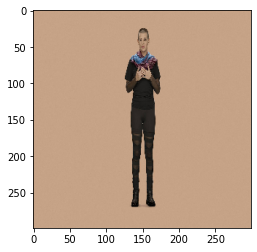

In [37]:
#loading and preprocessing cat image
IMAGE_PATH='/content/mad.jpg'
img=tf.keras.preprocessing.image.load_img(IMAGE_PATH,target_size=(299,299))
img=tf.keras.preprocessing.image.img_to_array(img)
#view the image
plt.imshow(img/255.)

In [38]:
import requests
#fetching labels from Imagenet  
response=requests.get('https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json')
imgnet_map=response.json()
imgnet_map={v[1]:k for k, v in imgnet_map.items()}
#make model predictions
img=tf.keras.applications.xception.preprocess_input(img)
predictions=model.predict(np.array([img]))
decode_predictions(predictions,top=5)

[[('n04350905', 'suit', 0.5531505),
  ('n02883205', 'bow_tie', 0.09933012),
  ('n04296562', 'stage', 0.04296196),
  ('n03680355', 'Loafer', 0.023934657),
  ('n10148035', 'groom', 0.013787307)]]